# Análise de Teoria de Filas - Dados de Chegada e Atendimento

Este notebook analisa os dados de chegada e atendimento usando fórmulas gerais de teoria de filas.
Os dados são extraídos dos arquivos CSV de chegada e atendimento.

## Fórmulas Utilizadas

- **Coeficiente C_n**: $C_n = \prod_{k=1}^{n} \frac{\lambda_k}{\mu_k}$
- **Probabilidade P_n**: $P_n = C_n \cdot P_0$
- **Probabilidade de normalização P_0**: $P_0 = \frac{1}{1 + \sum_{n=1}^{\infty} C_n}$
- **Número esperado de clientes no sistema (L)**: $L = \sum_{n=0}^{\infty} n \cdot P_n$
- **Número esperado de clientes na fila (Lq)**: $L_q = \sum_{n=s}^{\infty} (n - s) \cdot P_n$
- **Taxa média de chegada (λ)**: $\lambda = \sum_{n=0}^{\infty} \lambda_n \cdot P_n$
- **Tempo esperado no sistema (W)**: $W = \frac{L}{\lambda}$
- **Tempo esperado na fila (Wq)**: $W_q = \frac{L_q}{\lambda}$

In [72]:
# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
from scipy import stats

# Configurar estilo dos gráficos
plt.style.use('seaborn-v0_8')
sns.set_palette('husl')

In [73]:
#primeiro é necessário limpar os csvs
df_chegada = pd.read_csv('dados-Rua Deputado Antônio Eduardo Vieira C.csv', sep=';')
df_atendimento = pd.read_csv('dados-Rua Deputado Antônio Vieira A.csv', sep=';')

#eliminar todas as linhas de df_chegada que possuem valor da coluna chegada maior do que a do que o valor da coluna chegada da linha com mesmo valor na coluna elemento em df_atendimento e diminuir 1 do valor do elemento da proxima linha de df_chegada




In [74]:
# Carregar os dados CSV

print("Estrutura dos dados de chegada:")
print(df_chegada.head())
print("\nEstrutura dos dados de atendimento:")
print(df_atendimento.head())

Estrutura dos dados de chegada:
      Tipo      Carimbo de Data/Hora Tempo Total  Elemento  \
0  arrival  10/11/2025, 07:28:52.826       0.00s         1   
1  arrival  10/11/2025, 07:28:53.945       0.00s         2   
2  arrival  10/11/2025, 07:28:55.622       0.00s         3   
3  arrival  10/11/2025, 07:28:57.384       0.00s         4   
4  arrival  10/11/2025, 07:29:00.962       0.00s         5   

                   Chegando Saindo  
0  10/11/2025, 07:28:52.826     --  
1  10/11/2025, 07:28:53.945     --  
2  10/11/2025, 07:28:55.622     --  
3  10/11/2025, 07:28:57.384     --  
4  10/11/2025, 07:29:00.962     --  

Estrutura dos dados de atendimento:
      Tipo      Carimbo de Data/Hora Tempo Total  Elemento  \
0  service  10/11/2025, 07:30:08.339      12.72s         1   
1  service  10/11/2025, 07:30:23.107      13.03s         2   
2  service  10/11/2025, 07:30:37.347      10.09s         3   
3  service  10/11/2025, 07:30:48.384      25.40s         4   
4  service  10/11/2025, 07

In [75]:
# Pré-processamento dos dados

# Converter colunas de data para datetime
df_chegada['Chegando'] = pd.to_datetime(df_chegada['Chegando'], format='%d/%m/%Y, %H:%M:%S.%f')
df_atendimento['Chegando'] = pd.to_datetime(df_atendimento['Chegando'], format='%d/%m/%Y, %H:%M:%S.%f')
df_atendimento['Saindo'] = pd.to_datetime(df_atendimento['Saindo'], format='%d/%m/%Y, %H:%M:%S.%f')

# Ordenar por elemento (ID do cliente)
df_chegada = df_chegada.sort_values('Elemento')
df_atendimento = df_atendimento.sort_values('Elemento')

# Filtrar apenas elementos que existem em ambos os datasets
elementos_comuns = set(df_chegada['Elemento']).intersection(set(df_atendimento['Elemento']))
df_chegada = df_chegada[df_chegada['Elemento'].isin(elementos_comuns)]
df_atendimento = df_atendimento[df_atendimento['Elemento'].isin(elementos_comuns)]

print(f"Número de clientes analisados: {len(elementos_comuns)}")
print(f"Período de análise: {df_chegada['Chegando'].min()} até {df_atendimento['Saindo'].max()}")

Número de clientes analisados: 715
Período de análise: 2025-11-10 07:28:52.826000 até 2025-11-10 09:29:33.161000


In [76]:
# Calcular tempos entre chegadas e tempos de serviço

# Tempos entre chegadas (em segundos)
df_chegada_sorted = df_chegada.sort_values('Chegando')
inter_arrival_times = df_chegada_sorted['Chegando'].diff().dt.total_seconds().dropna()

# Tempos de serviço (em segundos)
service_times = (df_atendimento['Saindo'] - df_atendimento['Chegando']).dt.total_seconds()

# Calcular taxas
lambda_arrival = 1 / inter_arrival_times.mean()  # chegadas por segundo
mu_service = 1 / service_times.mean()  # serviços por segundo

print(f"Taxa de chegada λ: {lambda_arrival:.6f} clientes/segundo")
print(f"Taxa de serviço μ: {mu_service:.6f} clientes/segundo")
print(f"Utilização ρ: {lambda_arrival/mu_service:.4f}")

# Estatísticas dos tempos
print("\nEstatísticas dos tempos entre chegadas:")
print(inter_arrival_times.describe())
print("\nEstatísticas dos tempos de serviço:")
print(service_times.describe())

Taxa de chegada λ: 0.133570 clientes/segundo
Taxa de serviço μ: 0.113677 clientes/segundo
Utilização ρ: 1.1750

Estatísticas dos tempos entre chegadas:
count    714.000000
mean       7.486718
std       11.012142
min        0.166000
25%        1.050500
50%        2.700500
75%        8.438000
max       59.543000
Name: Chegando, dtype: float64

Estatísticas dos tempos de serviço:
count    715.000000
mean       8.796870
std        7.187552
min        0.262000
25%        2.418500
50%        7.108000
75%       13.254000
max       39.731000
dtype: float64


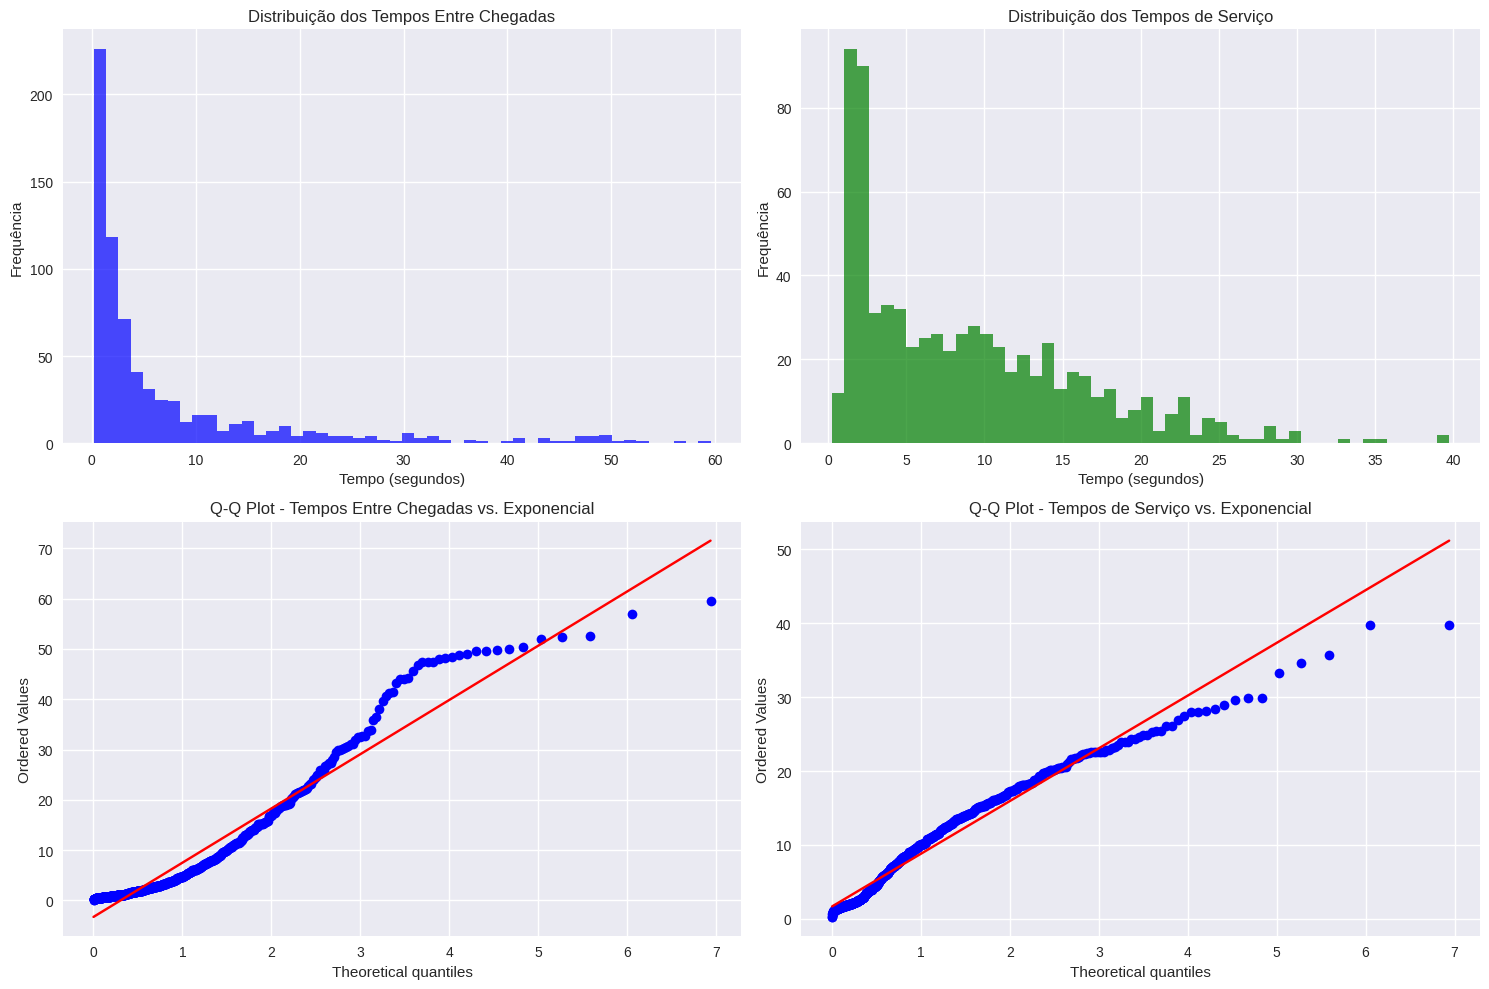

In [77]:
# Visualizações dos dados

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Histograma dos tempos entre chegadas
ax1.hist(inter_arrival_times, bins=50, alpha=0.7, color='blue')
ax1.set_title('Distribuição dos Tempos Entre Chegadas')
ax1.set_xlabel('Tempo (segundos)')
ax1.set_ylabel('Frequência')

# Histograma dos tempos de serviço
ax2.hist(service_times, bins=50, alpha=0.7, color='green')
ax2.set_title('Distribuição dos Tempos de Serviço')
ax2.set_xlabel('Tempo (segundos)')
ax2.set_ylabel('Frequência')

# Q-Q plot para tempos entre chegadas
stats.probplot(inter_arrival_times, dist='expon', plot=ax3)
ax3.set_title('Q-Q Plot - Tempos Entre Chegadas vs. Exponencial')

# Q-Q plot para tempos de serviço
stats.probplot(service_times, dist='expon', plot=ax4)
ax4.set_title('Q-Q Plot - Tempos de Serviço vs. Exponencial')

plt.tight_layout()
plt.show()

In [78]:
# Análise de filas usando fórmulas gerais

# Assumindo sistema com taxas constantes (λ_k = λ, μ_k = μ) e s=1
s = 1
lambda_k = lambda_arrival  # taxa de chegada constante
mu_k = mu_service  # taxa de serviço constante
max_n = 100  # truncar em 50 estados para cálculo aproximado

# Calcular coeficientes C_n
C = [1.0]  # C_0 = 1
for n in range(1, max_n + 1):
    C.append(C[-1] * (lambda_k / mu_k))

# Calcular P_0
sum_C = sum(C[1:])
P0 = 1 / (1 + sum_C)

# Calcular probabilidades P_n
probabilidades = [C[n] * P0 for n in range(max_n + 1)]

print(f"Probabilidade de sistema vazio (P0): {P0:.6f}")
print(f"Utilização aproximada: {1 - P0:.6f}")

# Calcular métricas de desempenho
L = sum(n * p for n, p in enumerate(probabilidades))  # Número esperado de clientes no sistema
Lq = sum((n - s) * p for n, p in enumerate(probabilidades) if n >= s)  # Número esperado de clientes na fila
lambda_eff = sum(lambda_k * p for p in probabilidades)  # Taxa média de chegada efetiva
W = L / lambda_eff  # Tempo esperado no sistema
Wq = Lq / lambda_eff  # Tempo esperado na fila

print(f"\nMétricas de Desempenho:")
print(f"L (clientes no sistema): {L:.4f}")
print(f"Lq (clientes na fila): {Lq:.4f}")
print(f"W (tempo no sistema): {W:.4f} segundos")
print(f"Wq (tempo na fila): {Wq:.4f} segundos")

Probabilidade de sistema vazio (P0): 0.000000
Utilização aproximada: 1.000000

Métricas de Desempenho:
L (clientes no sistema): 94.2856
Lq (clientes na fila): 93.2856
W (tempo no sistema): 705.8899 segundos
Wq (tempo na fila): 698.4032 segundos


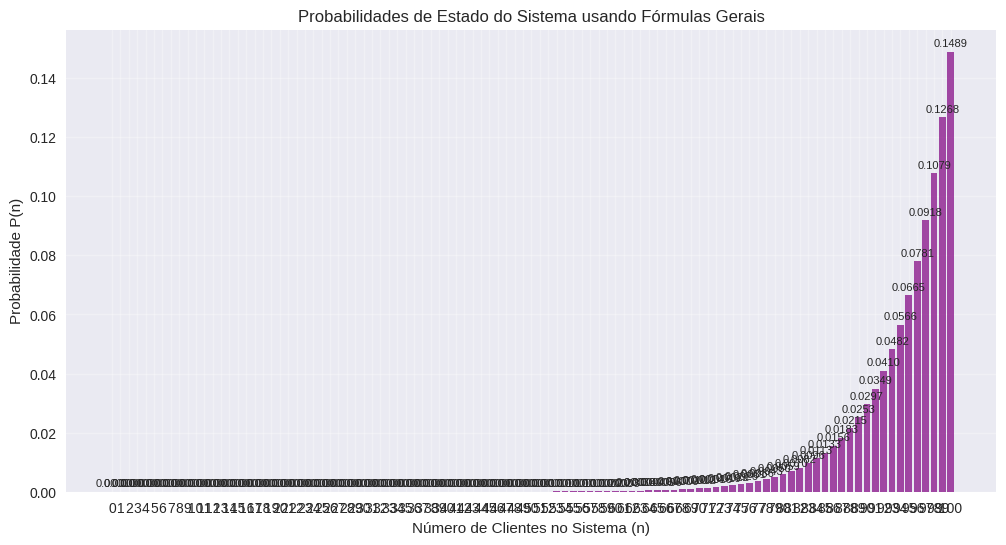

In [79]:
# Visualização das probabilidades de estado

plt.figure(figsize=(12, 6))

# Gráfico de barras das probabilidades
n_values = list(range(len(probabilidades)))
plt.bar(n_values, probabilidades, alpha=0.7, color='purple')
plt.title('Probabilidades de Estado do Sistema usando Fórmulas Gerais')
plt.xlabel('Número de Clientes no Sistema (n)')
plt.ylabel('Probabilidade P(n)')
plt.xticks(n_values)
plt.grid(True, alpha=0.3)

# Adicionar valores nas barras
for i, v in enumerate(probabilidades):
    plt.text(i, v + 0.001, f'{v:.4f}', ha='center', va='bottom', fontsize=8)

plt.show()

In [80]:
# Salvar dados tratados separadamente em novos arquivos CSV
nome_arquivo_chegada = 'dados_chegada_tratados.csv'
nome_arquivo_atendimento = 'dados_atendimento_tratados.csv'

df_chegada.to_csv(nome_arquivo_chegada, index=False, sep=';')
df_atendimento.to_csv(nome_arquivo_atendimento, index=False, sep=';')

print(f"Dados de chegada tratados salvos em: {nome_arquivo_chegada}")
print(f"Número de registros: {len(df_chegada)}")
print(f"Dados de atendimento tratados salvos em: {nome_arquivo_atendimento}")
print(f"Número de registros: {len(df_atendimento)}")

Dados de chegada tratados salvos em: dados_chegada_tratados.csv
Número de registros: 715
Dados de atendimento tratados salvos em: dados_atendimento_tratados.csv
Número de registros: 715
